In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [121]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

In [157]:
    # function that takes raw data and completes all preprocessing required before model fits
    def process_raw_data(fn, my_random_seed, test=False):
        # read and summarize data




    # QUALITATIVE FEATURES
    # remove self-identifying toxic measures
        toxic_data = pd.read_csv(fn)
        if (not test):
            # add an indicator for obscene, threat, insult, or indentity hate
            
            # testing removing all but one feature
            # toxic_data['any_toxic'] = ( toxic_data['obscene'] > 0 )
            toxic_data['any_toxic'] = ( toxic_data['threat'] > 0 )     
            # toxic_data['any_toxic'] = ( toxic_data['insult'] > 0 )       
            # toxic_data['any_toxic'] = ( toxic_data['identity_hate'] > 0 )     

            # toxic_data['any_toxic'] = (toxic_data['obscene'] + toxic_data['threat'] + toxic_data['insult'] + toxic_data['identity_hate'] > 0 )
            # print("toxic_data is:", type(toxic_data))
            # print("toxic_data has", toxic_data.shape[0], "rows and", toxic_data.shape[1], "columns", "\n")
            # print("the data types for each of the columns in toxic_data:")
            # print(toxic_data.dtypes, "\n")
            # print("The first 10 rows in toxic_data:")
            # print(toxic_data.head(10))
            # if (not test):
            #     print("The rate of 'toxic' Wikipedia comments in the dataset: ")
            #     print(toxic_data['any_toxic'].mean())

        # vectorize Bag of Words from review text; as sparse matrix
        hv = HashingVectorizer(n_features=2 ** 17, alternate_sign=False)
        X_hv = hv.fit_transform(toxic_data.comment_text)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
        
        # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_hv)
        



    # QUANTITATIVE FEATURES
    # number-based features from toxic comments to add to feature set

        # count of excessive exclamation points
        toxic_data['exclamations'] = toxic_data['comment_text'].str.count("\!\!\!")

        # boolean all-caps responses
        toxic_data_isupper = toxic_data['comment_text'].str.isupper(
                # if isupper_count is False
                #     print('0')
                # else:
                #     print('1')
                    )  

        # transform booleans to integers
        def boolstr_to_floatstr(b):
          if b == 'True':
              return '1'
          elif b == 'False':
              return '0'
          else:
              return b

        toxic_data['allCaps'] = np.vectorize(boolstr_to_floatstr)(toxic_data_isupper).astype(float)


        # count of use of the slang "sjw"
        toxic_data['sjw_count'] = toxic_data['comment_text'].str.count("sjw")


        X_quant_features = toxic_data[["exclamations", "allCaps", "sjw_count"]]
        print("Quantitative features include exclamation point count, uppercase usage, and count of disparaging language: ")
        print(X_quant_features.head(10))




    #COMBINING FEATURES    
    # Combine all quantitative features into a single sparse matrix
        
        X_quant_features_csr = csr_matrix(X_quant_features)
        X_combined = hstack([X_tfidf, X_quant_features_csr])
        X_matrix = csr_matrix(X_combined) # convert to sparse matrix
        print("Size of combined bag of words and new quantitative variables matrix:")
        print(X_matrix.shape)
        
        # Create `X`, scaled matrix of features
        # feature scaling
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        print(X.shape)
        if (not test):
            y = toxic_data['any_toxic']
        



    # CREATING DATA SETS
    # Create Training and Test Sets

        # enter an integer for the random_state parameter; any integer will work
        if (test):
            X_submission_test = X
            print("Shape of X_test for submission:")
            print(X_submission_test.shape)
            print('SUCCESS!')
            return(toxic_data, X_submission_test)
        else: 
            X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, toxic_data, test_size=0.2, random_state=42)
            print("Shape of X_train and X_test:")
            print(X_train.shape)
            print(X_test.shape)
            print("Shape of y_train and y_test:")
            print(y_train.shape)
            print(y_test.shape)
            print("Shape of X_raw_train and X_raw_test:")
            print(X_raw_train.shape)
            print(X_raw_test.shape)
            print('SUCCESS!')
            return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

In [158]:
# CHANGE FILE PATH and my_random_seed number: 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='/Users/smolloy/Dev/parsons/ml-2020_data/toxiccomments_train.csv', my_random_seed=42)

Shape of HashingVectorizer X:
(159571, 131072)
Quantitative features include exclamation point count, uppercase usage, and count of disparaging language: 
   exclamations  allCaps  sjw_count
0             0      0.0          0
1             0      0.0          0
2             0      0.0          0
3             0      0.0          0
4             0      0.0          0
5             0      0.0          0
6             0      1.0          0
7             0      0.0          0
8             0      0.0          0
9             0      0.0          0
Size of combined bag of words and new quantitative variables matrix:
(159571, 131075)
(159571, 131075)
Shape of X_train and X_test:
(127656, 131075)
(31915, 131075)
Shape of y_train and y_test:
(127656,)
(31915,)
Shape of X_raw_train and X_raw_test:
(127656, 12)
(31915, 12)
SUCCESS!


In [159]:
# logistical regression model - most accurate in sample data

from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log')
lgs.fit(X_train, y_train)

lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
lgs_performance_train.compute_measures()
print(lgs_performance_train.performance_measures)

{'Pos': 404, 'Neg': 127252, 'TP': 396, 'TN': 127238, 'FP': 14, 'FN': 8, 'Accuracy': 0.9998276618411982, 'Precision': 0.9658536585365853, 'Recall': 0.9801980198019802, 'desc': 'lgs_train'}


In [160]:
# linear SVM model

from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X_train, y_train)

svm_performance_train = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train')
svm_performance_train.compute_measures()
print(svm_performance_train.performance_measures)

{'Pos': 404, 'Neg': 127252, 'TP': 397, 'TN': 127243, 'FP': 9, 'FN': 7, 'Accuracy': 0.999874663157235, 'Precision': 0.9778325123152709, 'Recall': 0.9826732673267327, 'desc': 'svm_train'}


In [161]:
# ols model, usually bad

from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X_train, y_train)

ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
ols_performance_train.compute_measures()
print(ols_performance_train.performance_measures)

{'Pos': 404, 'Neg': 127252, 'TP': 226, 'TN': 58816, 'FP': 68436, 'FN': 178, 'Accuracy': 0.4625086169079401, 'Precision': 0.0032914858291340186, 'Recall': 0.5594059405940595, 'desc': 'ols_train'}


In [150]:
# naive bayes, variables must be independent (these happen to be)

from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
nbs_performance_train.compute_measures()
print(nbs_performance_train.performance_measures)

{'Pos': 404, 'Neg': 127252, 'TP': 404, 'TN': 124266, 'FP': 2986, 'FN': 0, 'Accuracy': 0.9766090117189948, 'Precision': 0.1191740412979351, 'Recall': 1.0, 'desc': 'nbs_train'}


In [162]:
# perceptron

from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(X_train, y_train)

prc_performance_train = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train')
prc_performance_train.compute_measures()
print(prc_performance_train.performance_measures)

{'Pos': 404, 'Neg': 127252, 'TP': 399, 'TN': 127232, 'FP': 20, 'FN': 5, 'Accuracy': 0.9998041611831798, 'Precision': 0.9522673031026253, 'Recall': 0.9876237623762376, 'desc': 'prc_train'}


In [152]:
# ridge regression classifier

from sklearn import linear_model
rdg = linear_model.RidgeClassifier()
rdg.fit(X_train, y_train)

rdg_performance_train = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train')
rdg_performance_train.compute_measures()
print(rdg_performance_train.performance_measures)

{'Pos': 404, 'Neg': 127252, 'TP': 265, 'TN': 127239, 'FP': 13, 'FN': 139, 'Accuracy': 0.9988092999937331, 'Precision': 0.9532374100719424, 'Recall': 0.655940594059406, 'desc': 'rdg_train'}


In [163]:
# random forest classifier

from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=2, random_state=0)
rdf.fit(X_train, y_train)

rdf_performance_train = BinaryClassificationPerformance(rdf.predict(X_train), y_train, 'rdf_train')
rdf_performance_train.compute_measures()
print(rdf_performance_train.performance_measures)

{'Pos': 404, 'Neg': 127252, 'TP': 0, 'TN': 127252, 'FP': 0, 'FN': 404, 'Accuracy': 0.9968352447201855, 'Precision': nan, 'Recall': 0.0, 'desc': 'rdf_train'}


/Users/smolloy/Dev/parsons/ml-2020/jupyter/_firstProject/TC/my_measures.py:25: RuntimeWarning: invalid value encountered in long_scalars
  self.performance_measures['Precision'] = self.performance_measures['TP'] / (self.performance_measures['TP'] + self.performance_measures['FP'])


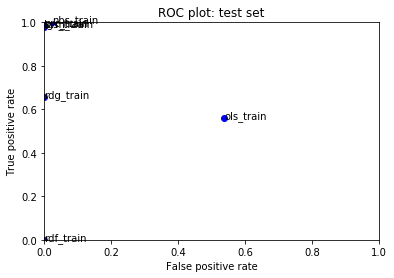

In [164]:
fits = [ols_performance_train, svm_performance_train, lgs_performance_train, nbs_performance_train, prc_performance_train, rdg_performance_train, rdf_performance_train]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [165]:
ols_predictions = ols.predict(X_train)

In [166]:
# false positives

print("Examples of false positives:")

import random, time

for i in range(0, len(ols_predictions)):
    if (ols_predictions[i] == 1):
        if (X_raw_train.iloc[i]['any_toxic'] == 0):
            if (random.uniform(0, 1) < 0.05): # to print only 5% of the false positives
                print(i)
                print(X_raw_train.iloc[i]['comment_text'])
                print('* * * * * * * * * ')

Examples of false positives:
42
You a joker. You point of view is absolutely not neutral. I am going to report you. You rather stop you activity since it is just what the last world need. You show completely lack of history saying that:
1) Recovered territories are “supposed” be historical Polish territories
2) Assuming that the Nazi Party are free responsibility of WWII results.
Finally you erase valuable lings for objective true. You have no arguments look for mediator commission.
Andrew
* * * * * * * * * 
93
"

Your latest 'action' against me

I responded to you on that page, but would like to point out that you have a habit of avoiding issues that I bring up. Why is that ? Simply not responding does not make them less relevent. But  what do you think ?  Cheers.  | Talk 

p.s. I've changed my mind and decided that I do kind of like your old signature and, since you've abandoned it, will be using it; if you have any copyright or 'intellectual property' issues with that, please let me

2645
"

 Wikipedia's Policy of Verifiability 

Hi there.
You have repeatedly added unsourced material into this BLP article. Wikipedia's Policy of Verifiability stipulates: 

""All quotations, and any material whose verifiability has been challenged or is likely to be challenged, must include an inline citation that directly supports the material. Any material that needs a source but does not have one may be removed. Please remove contentious material about living people that is unsourced or poorly sourced immediately"".

Referring to another article for verifiability is thusly not permitted because of the inline citation requirement. I have undone your addition because it contains an unverified claim (""performs exclusively"") that is not supported by any of the sources in the BLP article and in the article you are referring to in your edit summary. Please add reliable sources to your edits before re-adding the content back to the BLP article. Thank you. 93.135.19.127  "
* * * * * * *

5145
who even though he has a clear COI, threatened me
* * * * * * * * * 
5162
Recent edits 

Hi , some of your recent edits have been stopped by an automated filter. This is likely due to attempting to add an external URL to a site such as 'gameofthrones[dot]wikia[dot]com/wiki/Dothraki' - if you'd like to discuss this, or if you need any other help, just let me know )  (msg)
* * * * * * * * * 
5216
Albanians against the Ottomans
I have read here and also heard from many people that the albanians were also fighting against the ottomans.
In the belligerents you should add albania. Many orthodox albanians were forced to flee or convert to be muslim and it is important that you clarify this in the article.
http://www.albanian.com/v4/showthread.php?t=8470

   An anti-Ottoman coalition of Hungarians, Bulgarians, Romanians, Poles, Serbs and ALBANIANS headed by the Serbian   prince Lazar fought a Turkish army twice its size on the plain of Kosova near Pristine on 15 June 1389. 
   Troops of  

8104
"

 Virginia Tech Project Invite
 
As a current or past contributor to a related article, I thought I'd let you know about WikiProject Virginia Tech, a collaborative effort to improve Wikipedia's coverage of Virginia Tech. If you would like to participate, you can visit the project page, where you can join the project and see a list of open tasks and related articles. Thanks!
  "
* * * * * * * * * 
8171
* Click here to leave me a new message
* * * * * * * * * 
8173
I provided the refs in the article, they are the statutes in the respective states that say appointments are until the next general election, not the end of the term. -
* * * * * * * * * 
8245
From user 's page: 
General thought

If you believe that change is necessary to bring Wikipedia out of the stone ages, make it happen! That is how Wikipedia evolves. Don't let stubborn editors stuck in the past get in your way. Work for the greater good, not the good of those stuck in their ways. There are ways and means of making

11934
chris carter was killed on the columbine school grounds.
* * * * * * * * * 
11970
Shane is a Hugh Douche Bag
* * * * * * * * * 
12028
==H. Das reply== 

Well, I'm more concerned with the living at this point, i.e. Ekajati. Blnguyen claims they had no overlapping edits and bases his assessment on the improbablity of this, but I found three examples of overlapping edits within a few minutes of looking for them! Something fishy here.  (Talk)
* * * * * * * * * 
12030
Fuck the shit out of you, Nil! 

Learn to use better manners, or you will be banned! Aksai Chin deservedly is Chinese territory for the people living there are TIBETAN, not your motherfucking Hindu scum! Haha, so sad too bad China killed you in 1962!
By the way Nil, you must really love anal fucking!
* * * * * * * * * 
12145
"

 Dulaim 

That article needs some massive overhauling and we are very interested in your input.

Cheers mate!

 (Operibus anteire) "
* * * * * * * * * 
12171
Agreed. Let's hope  somebody can find 

14716
Stop Removing Sources/Material Without Describing your Rationale Here 

Someone removed the sentence, backed with SCHOLARLY SOURCES, concerning CNN's perceived bias. They did not approach the discussion page first. Therefore, I put them back as they were. These were scholarly sources, and the substantive content is appropriate, just as the statement concerning bias in the intro of the Fox News paragraph is appropriate.
* * * * * * * * * 
14719
"

The website that you're citing is a British site for the British monarchy.  It is a government site maintained by the British monarchy.  The website for the Canadian monarchy is run by the Canadian government and names Elizabeth II as the Queen of Canada, as does the website for the Canadian Governor General, the Queen's representative in Canada.  The website for the Governor General of New Zealand refers to her as the Queen of New Zealand.  This site is run by the government of New Zealand on behalf of the Queen's representative in New 

18344
and batiushka loved russian Orthodox church
* * * * * * * * * 
18363
X232=4,096 X=2
                    
                strikesstrike
* * * * * * * * * 
18383
"Thank you for experimenting with the page Bulge on Wikipedia. Your test worked, and it has been reverted or removed. Please use the sandbox for any other tests you want to do. Take a look at the welcome page if you would like to learn more about contributing to our encyclopedia.  A link to the edit I have reverted can be found here: link. If you believe this edit should not have been reverted, please contact me.  '''''' talk! "
* * * * * * * * * 
18497
Kd lvr/Vandalism Request...Sorry
My apologizes on the request.  I didn't know that there was a standing request for it to be moved to another board.  I will move it to the WP:ANI board.  Again, please accept my apologizes. -  (VT)
* * * * * * * * * 
18501
Thanks for the follow up; why would you think you might have the same IP address as
* * * * * * * * * 
18507
"== Wikiped

20959
"

Someone change the opening section for well written one.  Who writes this childish garbage? Here is is...

Everton Football Club are an English professional football club from the city of Liverpool, England. [from Liverpool, they are IN Liverpool] Having competed in the top division for a record 107 seasons, [do not mention years it will change in a year] they [do not mention ""they"" very amateurish and bad English] have played more top-flight league games [the word is matches not games] than any other English team and [avoid ""and's"", very amateurish] have won the League Championship nine times—the fourth highest of any team.[1] The club competes in the Premier League, being ever-present since the league was founded in 1992.

Formed in 1878, Everton were founder members of The Football League in 1888 and [avoid ""and's"", very amateurish] won their first [avoid ""their"", very amateurish] league championship three years later. [date of formation and winning not connected, s

24808
Incorporating all these suggestions could give this version:

AIDS (Acquired Immunodeficiency Syndrome) is a global human epidemic. The etiologic agent of AIDS is a retrovirus designated human immunodeficiency virus HIV. AIDS is defined as a CD4+ T-lymphocyte count less than 200 cells/uL or an AIDS-defining condition in persons with HIV antibodies. 

This avoids much of the POV unreferenced specualation  01:49, 4 Jun 2005 (UTC)
* * * * * * * * * 
24817
I'm afraid I can't find the toggle. I have one page where the tooltips don't appear, so I must have toggled the gadget off for that page, and now I can't find where to toggle it back on. Thank you for your help.
* * * * * * * * * 
24846
Archived discussion (worth a look!): [[List_of_Jews
* * * * * * * * * 
24854
This example of hard work is now to be found in  Wiktionary. I just thought you might like to know.  The provenance looks as if I were the one who added it; but I can only guess that an administrator copied it from my archi

27687
Ignoring messages  and etc 
Hi, Wikipedia english relies on multiple points of view and sources - (a) you seem to think certain sources are ok to have claims to the final answer to a complex and contentious issue (b) you appear to not have any knowledge of Indonesian language  (c)  take care, ignoring messages can lead to the point of being blocked. (d) Take care also you do not come over as a WP:SPA
* * * * * * * * * 
27701
"
Well, he shouldn't call your edits vandalism unless they are vandalism.  See WP:Vandalism.  What you were doing to his talk page was not vandalism but I can see how he might have come to think of it that way.  Are there other examples of his calling your regular, good-faith edits ""vandalism""?    "
* * * * * * * * * 
27705
If he had an interview with Glenn Beck then Glenn Beck would have done it that very day. Until said interview comes out it is mere rumor. Its like the 'Zimmerman is in Arizona' comments. Rumor until proven otherwise. As they are not even

31295
I do not agree with your undoing of the video the  discussion above shows that there is  consensus.
* * * * * * * * * 
31348
The source was a local guide book, how do we source that?
* * * * * * * * * 
31378
Who the fuck do you think you are 

A checkuser or something?
* * * * * * * * * 
31436
Whatever it seems to be I am trying, I am not trying to emphasize. I gave you some information - facts which shouldn't be ignored in Wikipedia but you just delete them. Please try work them in somehow. The fact that I cannot put those correctly, regarding my English or skills on Wikipedia does not mean those infos should not be there. Thanks.
* * * * * * * * * 
31490
Encryption capability 

I recommend adding a column to show whether the format supports encryption. The table as it stands now is missing formats such as TrueCrypt, freeware that enables you to pack huge folders away into a single encrypted archive file. You can edit within the archive, then simply dismount and drag&drop; to ma

34443
images 

would it be alright to upload a few (of my own) screenshots from the game?
* * * * * * * * * 
34466
"

 Merry Christmas 
150x100px|left

70.95.69.64  is wishing you a Merry Christmas! This greeting (and season) promotes WikiLove and hopefully this note has made your day a little better. Spread the WikiLove by wishing another user a Merry Christmas, whether it be someone you have had disagreements with in the past, a good friend, or just some random person. Don't eat yellow snow! You're still stupid )  

Spread the holiday cheer by adding {{subst:User:Flaming/MC2008}} to their talk page with a friendly message."
* * * * * * * * * 
34492
"

 Raging 223 

There is no reference to the Raging 223 on the Taurus site.  Is this a currently offered model? Surv1v4l1st (Talk|Contribs) "
* * * * * * * * * 
34528
There are no claims to falafel being from Cairo. In fact, they call it something else there. On the other hand we have multiple sources discussing its prevalence in Alexandr

37882
EL discussion 

Hey Doug, I happened upon Wikipedia:External_links/Noticeboard#www.rozabal.com and couldn't refrain from commenting. Best,
* * * * * * * * * 
37938
Your discarding of vandalism complaints 

Re a recent vandalism report I submitted , the user in question has received numerous complaints, including from bots, and has resumed the same independent activity after being blocked a couple weeks ago. The user is rarely using authoritative references but apparently only what turns up first on Google. I'd feel differently if the vandal were responding at all to any complaints or if the user weren't making dozens of similar edits each day. I've learned my lesson from you and I won't complain about this user again, and I certainly won't report any others that regularly trash WP with similar types of rumors and fake references, so I don't expect a reply from you, but I think you are making a serious mistake by not treating this as vandalism and immediately imposing restraints. 

40569
Userbox
Hello. A userbox you are using (Template:User queerrights) has been moved to user space per WP:GUS. The new link is  and leave any questions you may still have on my talk page. Thank you.
* * * * * * * * * 
40618
You are a fucking dick pseudomonas 

you do not deserve to live fucking piece of shit
* * * * * * * * * 
40620
", 23 July 2005 (UTC)
Nice try, Smyth, but all the history of discussion is right here and in the archives for anyone to see. We all think your subjective opinion piece is among the worst introduction written for any article on Wikipedia. We all demand an objective definition, and have suggested dozens. Yet, you and your ""sockpuppets"" play this little game of confusion and misdirection until people get frustrated and stop trying. I can understand why you would war-edit instead of helping us find an amicable resolution if you were getting paid, so I sure hope you are. Zephram Stark 22:02"
* * * * * * * * * 
40774
I always got the impression he was a rea

43430
"

 Edgeworth's Father's Name 

I have a theory that they named Edgeworth's father ""Gregory"" as a tribute to Gregory Peck who played defense attorney Atticus Finch in the movie adaption of To Kill a Mockingbird(1962). This might not be the best place to post this but I wasn't sure where else I could try.  "
* * * * * * * * * 
43433
.. Sorry if it came off that way because of how I kept on complaining about Seether not being on the list
* * * * * * * * * 
43441
"

Yeah, I think I wrote most of that section some years ago (although I didn't give it the heading ""Summary"", which makes it sound more definitive than I perhaps meant). I'd write it differently now, with more references for a start. I've just rewritten the Summary to be less OR, although it still needs the references.
The rest is not incredibly straightforward as a lot of the most recent research is not in widely available reliable sources. I think Bane's stuff is fine as far as it goes, especially his summary of othe

48211
"

Oh, that is what it seemed to me when I read the results on TNA.com. Besides the Booker feeling sorry. Though I might have done it the same way. But I would of had it a little different. Without making everyone think feel sad. I would of had Joe win but with help from Sting. I guess they're setting up Joe vs Booker T vs Sting at Hard Justice.C "
* * * * * * * * * 
48226
Hmm, I hadn't thought it was worth sending Tom Swift to FAC since the section on the fifth series is so short. Maybe I will though, since you mention it. Best,
* * * * * * * * * 
48256
So will you please inform as to how Jura House are able to have an external link?
* * * * * * * * * 
48261
Shoo! Complaining about something that I refactored a moment later is silly.
* * * * * * * * * 
48384
"

 Books for VN history 
Hi PHG. I saw that you cited McLeod and Chapuis. If you would like it, I can email you a full PDF copy of these two books, which gives full access and you can cut and paste and whatever you want. An

51184
Stop inflicting censorship to wikipedians by removing their comments 

Even if you had a point, it is destroyed by you not removing other comments with the same quality.
* * * * * * * * * 
51362
You read it; your note addressed something else.  (Incidentally, your reasoning above is unsound; whether or not my Rushdie comparison holds up, it does not fail to hold up because his literary career is not a failure).  But I hope you understand, I am not trying to get any decision reversed (and never was).  Rather, I am yelling at you for enforcing a stupid policy. -
* * * * * * * * * 
51399
"

the ""code"" of DNA and RNA is never the same because DNA has the base thymine and when DNA is transcribed to RNA it is changed to uracil.    by the way."
* * * * * * * * * 
51425
"

Dude get over yourself. Grow Up its a freaking stamp. Does it ruin your day, Can you not sleep at night if its not there. Cmon your a freaking 32 year old man with no life, (that probably still lives with his mom), t

54160
"

 Population! 
Hi, I am pretty sure that in the Bulgarian Wikipedia it is stated that the population of the city of Pazardzhik (Пазарджик) is merely 78,493, which is about 40,000 people less than the number stated on the English Wikipedia (117,717). I hope someone can fix this mistake.
Thanks, 
User:Dako1 "
* * * * * * * * * 
54253
"
The Graceful Slick....
Is non other than an ungraceful dick!81.131.78.39  "
* * * * * * * * * 
54282
My pleasure...I was actually going to commend to two of you for being the former FA back....good work.
* * * * * * * * * 
54289
This should be fixed now.
* * * * * * * * * 
54378
"
I see you both have been blocked for 24 hours for violating the 3 revert rule, which is appropriate. When your block is lifted, please use the article talk page to resolve the dispute, and do not revert each others' edits. Call in the mediation committee if need be. ~81(C) "
* * * * * * * * * 
54502
AfD voting pattern 

Hi Unrepentant, 

I've noticed that you are nominati

56762
Arranged by Host
To make for easy section handling and links.
* * * * * * * * * 
56806
"::::I can live with this current variant, but since UK parliament did enact SoW, the date does apply. Please note that the table/date does not read ""since when"" anywhere, hence my original request - and that would likely be ambiguous also, since they were arguably realms/dominions/whatever before with slightly different status. Simplest would be to avoid the question of what ""since when"" means and limit future discussion/argument about the nuances of ""realminess"" by having fact that cannot be disputed. Would anyone object to having 1931 in the box, but with a footnote saying that, as realm from which others gained independence, not applicable to UK internal governance? This would clarify that UK also enacted Westminster and should be unassailable internal logic.  

"
* * * * * * * * * 
56822
Perhaps I was misinterpreting your comments. One seemed enthusiatstic while the other seemed subd

59767
"

 Who lives in Meredith's house: 

I've had to edit this several times over the past few days, and different individuals keep changing it back.  In assuming good faith, I will guess that these are individuals who have not yet been able to watch the full third season.  However, as of episode 3x18, ""Scars and Souvenirs"", which has aired in the United States and Canada, Alex Karev is a resident of Meredith Grey's home.  George had moved out prior to episode 3x15 ""Walk on Water"", leaving his room vacant as he moved into the Archfield Hotel with his new wife, Callie Torres.  Alex moved in and took residence of the room that George once lived in.  The rent paying housemates are Alex and Izzie, not Izzie and George."
* * * * * * * * * 
59847
"

 Aslan and Dr Rafizadeh 

 , I and   —Preceding undated comment added  

 , I and  (talk ⋅ contribs) We do not care that WIKINEWS even considers Dr. Rafizadeh as an expert and interviewed hin here: https://en.wikinews.org/wiki/Wikinews_inte

63263
WikiProject Alternative music September 2007 Newsletter  You are receiving this newsletter because you have signed up for WikiProject Alternative music. If you wish to stop receiving this newsletter, or would like to receive it in a different form, add your name to the appropriate section here. This newsletter was delivered by the automated   .
* * * * * * * * * 
63311
"

Clearly you were not involved in the creation of Usenet newsgroups in the uk.* hierarchy in the mid-1990s as I was! I remember the original proposal for uk.local.northwest, being a newsgroup intended to cover northwest England. There was an immediate and vociferous reaction from our Caledonian brethren who pointed out, accurately, that northwest England is just about in the middle of the island and by no stretch of the imagination is the ""northwest"" of the UK. We eventually ended up creating uk.local.nw-england. Wales is, indeed, very much in the southwestern quadrant of the island of Great Britain, and I woul

65303
Perhaps because you haven't added it yet ;-)? Feel free to be bold and edit your information into the article!
* * * * * * * * * 
65327
- Material which is entirely sourced from the Wikipedia article that I created on De Poelen, Dronrijp.
* * * * * * * * * 
65364
Troll? Like one of those little furry-haired things? Anyway, saw your sandbox. Anyone ever tell you look like Harry Potter.69.243.42.251
* * * * * * * * * 
65427
OK, I don't think anyone will have issue with the additions to the FCB as I add exact chronology, dates and references. By doing this with notes on the no. of the Ultron upgrade, there is no need for the not-so-well written Incarnations sections. We will talk about what is still out with one of the bottom sections, but not today. No need for that straight off the bat.
* * * * * * * * * 
65469
I see no reason. WHAT IS THE SENTENCE OR THE WORDS??????
* * * * * * * * * 
65499
Attention Biaatch=
I know you want to be me, but u aren't. I don't like posers, so don't p

68587
"Ahoerstemeier|andy]] 17:23, 12 Feb 2005 (UTC)

 Jesus, pre-4th century Christianity, and syncretism 

I have added a comment on the VfD page. See Wikipedia:Votes for deletion/Jesus, pre-4th century Christianity, and syncretism#Discussion about the merge. If I could find out which bits to merge, I'd be very grateful for feedback! -  11:56, 23 Feb 2005 (UTC)

 That was a pretty horrible thing you said you know. 

Did you actually bother to investigate CheeseDreams? did you check her ArbCom cases? Did you check how she deliberately and spitefully vandalised my user page? Did you bother to read any of the things I wrote? Where do you get off saying I enjoyed having CheeseDreams banned? I didn't do that: CD did that via her editing practices and disruption of Wikipedia. -  15:19, 25 Feb 2005 (UTC)

Say what?! Look mate, I'm disputing the article, not CheeseDreams. The article is an essay written from an assumption (and in fact pretty much stated as ""fact"") that Jesus was the ""new 

71218
That's a great find. I hope you didn't have that all along and were keeping it from us -) That certainly more than satisfies Wikipedia's criteria. Please add that book to the article's references when you get a chance. (And sorry for my delay in replying. I haven't been on Wikipedia in a while.)
* * * * * * * * * 
71285
This is more specific Talk:Individual_and_political_action_on_climate_change#Add_File:Nested_sustainability-v2.gif ... Wikipedia:Adminitis?  99.190.87.1
* * * * * * * * * 
71300
What you need to do Mokele is think about if becoming an editer was a good idea.

So you Chill Out.

All the information you post on this site is no more reliable than any other site's.
* * * * * * * * * 
71303
YEA SHE MY FRIEND BUT SUMTIMES LYK WEN RAYSHAWN WAZ AT THA TABLE SHE MADE AGGRAVATED!!!!IS HE EVEN HERE TODAY???
* * * * * * * * * 
71352
The article should be renamed with the new RFK name, and all re-directs pointed towards the new name. The city has already started posting ads ar

74299
And women wrestlers should be cut a bit more slack than the males, as they don't wrestle as often as men do anyway.
* * * * * * * * * 
74368
"""List of United States cities by area"" says Sitka, Alaska, has 4,812 square miles, of which 2,874 are land; Juneau, Alaska, has 3,255 square miles, of which 2,717 are land; Anchorage, Alaska, has 1,961 square miles, of which 1,697 are land; and Jacksonville, Florida, has 874 square miles, of which 758 are land.

""List of cities by surface area"" matches that, except that it mentions ""Juneau City and Borough"".

The pages about those four individual cities today have figures that match, too. Yet, when I posted in this section several days ago, the article on Jacksonville said 1,962.4 square miles.

Jacksonville's own government website says it has 841 square miles, not 874 or 758.

I'm not sure whether some people or governments are rightly or wrongly putting all of a county's land into the city's listed area. I can say that, in the case

77226
"

 The passage on foreign language education is unclear 

English is compulsory throughout the state in secondary schools, but it is not always the first foreign language; pupils at Gymnasium are often required to learn Latin as their first foreign language. In some states, foreign language education starts in the Grundschule (primary school). For example, in North Rhine-Westphalia, English is started in the third year; Brandenburg starts with either English or Polish, and Baden-Württemberg starts English in the first year.

I'm a bit unclear on the sentence starting ""For example,"". Convention requires this to offer examples related to the immediately preceding sentence (foreign language education in Grundschule (primary or elementary school)), but after reading it I started wondering whether these were actually examples relating to the preceding sentence (i.e. English not always being the first foreign language).   "
* * * * * * * * * 
77239
You have proved your connivance wi

80869
, 18 January 2008 (UTC)
You're welcome for the message. Don't be disheartened! Is there an IMDB link for this movie?  speak! 18:39
* * * * * * * * * 
80888
"

What did I not spell correctly you prick? I never have used the term ""Charlottan""

"
* * * * * * * * * 
80903
Fixed. You know, you could of just fixed it yourself. I think it's a B-class, shall I upgrade it?   #12 (samtal)
* * * * * * * * * 
80935
"

 since people seem to think this page is static i may as well treat it like my own for a momment 
// Admin-like RC Patrol tools

document.write('');
//Ryulong
(god mode light ^_^) courtesy of Voice of All, a lot less buggy than Lupin's version, almost no need for tweaking "
* * * * * * * * * 
80942
Sub-Saharan Africa 

Surely Sub-Saharan Africa is an oxymoron?
* * * * * * * * * 
81041
Trying to find loopholes in everything isn't a good way to live your life. If you find a loophole, you find a mistake. It's not that you found the true meaning of something. In this case, for ex

83673
"

 WWE Legends of WrestleMania 

Per consensus at Wikipedia talk:WikiProject Video games/Archive 65#Roster in wrestling articles, only a summary prose should be used. Not a list.CO "
* * * * * * * * * 
83681
"
Done and done. nableezy - "
* * * * * * * * * 
83747
Emplying you love large Pen1s is outragous
* * * * * * * * * 
83800
culture killers
why on earth did you delete this page??? it has not violated any rules and is under construction!!!
* * * * * * * * * 
83812
"

And those sources are not sufficiently reliable for an accusation that amounts to ""Eichenwald is a pedophile.""  "
* * * * * * * * * 
83829
Hawkesbury and Nepean Wars 
Hello AustralianRupert, I noticed you are good with colonial articles. I too mainly deal with Australian military history more or less centered on the War in Afghanistan 2001-present, but I recently created the article Hawkesbury and Nepean Wars, if you could help in anyway to it, it would be greatly appreciated. Thanks.
* * * * * * * * * 
83831
I

87055
"

 Please do not vandalize pages, as you did with this edit to Talk:Wikipedia. If you continue to do so, you will be blocked from editing.  13  "
* * * * * * * * * 
87082
Oppose: Quebec is clearly the official, as well as the most commonly used, English name.  Regarding the Indian example above, the official English name was changed from Calcutta to Kolkata.
* * * * * * * * * 
87116
Mine seems to be OK now.
* * * * * * * * * 
87147
Vincent Cannistraro
Thank you so much for protecting my work from vandalism. I have tried very hard to footnote every claim in the article, and if you would like to discuss any ideas you have for improving it, then I'd be more than happy to do so on the talk page. Thanks,
* * * * * * * * * 
87152
"

 US 11 NY map 

Hey. Because of a flaw in the FHWA data, part of the highlighted route on File:US 11 (NY) map.svg is actually NY 11C. The FHWA data never flipped the alignments of US 11 and NY 11C when they were flipped in 1992. Could you correct the map t

90560
"

To whom it may concern

in regards with laws, your actions are a direct violation of  Privacy_laws_of_the_United_States, as well as Wiki rules. Please do not attack other editors. If you continue, you will be blocked from editing Wikipedia. 

In regards with discussions, this is NOT a place for arguments. In regards with encyclopedia style, the article needs to fit in it in order to stay in Wiki, and attempts to re-write it into another style do nothing but harm.

In regards with the article factual sense, there is nothing to argue about. There is no evidence proving that nomads fight tested the dogs versus fighting them ""just for money"". Same applies to modern times. Not to mention that nomads did NOT develop the breed initially, because the breed was originally established by whoever was raising sheep or goats, while nomads were traveling, so they helped to spread it. As per fighting dogs of this breed in some countries, there is already a clear outline in this article alr

94671
I agree. BTW, same story about Navahradak being capital is also repeated on Belarus article. I think these disputes about various national ways to present history of GDL should be on article Grand Duchy of Lithuania and everyone who wants to read more about the Duchy would click the link.
* * * * * * * * * 
94714
"==Notability of Chen Yue==
A tag has been placed on Chen Yue requesting that it be speedily deleted from Wikipedia. This has been done because the article appears to be about a person, group of people, band, club, company, or web content, but it does not indicate how or why the subject is notable: that is, why an article about that subject should be included in an encyclopedia. Under the criteria for speedy deletion, articles that do not assert the subject's importance or significance may be deleted at any time. Please see the guidelines for what is generally accepted as notable. 

If you think that you can assert the notability of the subject, you may contest the delet

97036
"

 Place of birth missing / Year of birth missing 

You would think... with ALL the copious time and effort devoted to all the minutiae of this article, that a simple thing like date and place of birth would have been added by now, given that it's been in everyone's face for days now. Another reason I feel that all the attention paid here has jack-squat to do with ""NPOV"" or ""Wikipedia policies"" and everything to do with Harvey being a dissident.  "
* * * * * * * * * 
97056
"

Intel editing WP

Found this, hilarious.   talk "
* * * * * * * * * 
97183
"

FOR THE 100TH TIME, WE SPEAK VALENCIAN, NOT CATALAN, THEY ARE SISTER TONGUES BUT ONE DOES NOT COME FROM THE OTHER ONE. IN FACT VALENCIAN EXISTED BEFORE CATALAN, AND COMES FROM LATIN. FURTHERMORE, NO ONE CALLS THE OLD KINGDOM OF VALENCIA OR THE VALENCIAN COMMUNITY ""VALENCIAN COUNTRY"", ONLY THE CATALAN SEPARATISTS DO THAT, WHICH IS VERY INSULTING FOR US VALENCIANS. IM FED UP WITH THIS BIASED-CATALANIST VERSION OF WIKIPEDIA."
*

100029
REDIRECT Talk:Jefferson Airplane compilation albums
* * * * * * * * * 
100031
When will my Block be over/Please give me a more specific reason why I was Blocked? 

Leave Me a message here
* * * * * * * * * 
100051
PLEASE STOP LIE 
sock puppet of Azukimonaka??YOU ARE LAIR KOREAN.STOP personal attacks210.231.12.98
* * * * * * * * * 
100065
of information, particularly when the information is used to state what they said.
* * * * * * * * * 
100118
Requested move 

:Maldivian language →  – Dhivehi is the word referred to the language Maldivians speak and the official language of government of Maldives, Dhivehi is the language of Maldives spoken by Maldivians, Dhivehi is the common and official name referred to the  language used by Maldivians, Maldivian is not used or referred as a language.
Article 11 of the constitution states: The national Language of Maldives is Dhivehi language.
See Dhivehi language used in local news eg: http://www.haveeru.com.mv/dhivehi_language/38905
(Look f

103070
"

I'm confused about your comments in both straw polls.  The decision is not between using ""The Beatles"" and ""the The Beatles.""  It's either between ""the Beatles"" and ""The Beatles"" for instances where the name shows up in the middle of a sentence.  For instance, ""It's impossible to deny the influence that the Beatles had on rock music.""    "
* * * * * * * * * 
103153
Moron 

Keep your nose out, imbecile.
* * * * * * * * * 
103156
"
Please read and notice the word jointly. 

(taken from: http://ec.europa.eu/justice_home/news/events/events_2008_en.htm)

European Hearing: ""Crimes Committed by Totalitarian Regimes""
On 8 April 2008 a European Hearing entitled ""crimes committed by totalitarian regimes"" took place in Brussels. This was organised jointly by the Slovenian Presidency of the European Union and the European Commission around the two key issues of recognition of the crimes and reconciliation.   "
* * * * * * * * * 
103161
Bongwarrior is a faggot.
* * * * * * *

106050
Turkey... 

Alright Turkey,
Thats the second and apparently only warning (despite the fact i've had two for personal attacks). Wikipedia has lost all its credibility, not that it ever had any. Shove it pal.
* * * * * * * * * 
106092
also praised Press TV
* * * * * * * * * 
106148
Move the different languages down a bit? 

The current version of the article begins by listing the word(s) for salo in thirteen (13) languages, even before explaining what it is.

Would it perhaps be more readable if we moved the sections about different words to the section about different varieties? -
* * * * * * * * * 
106205
"

MfD nomination of Wikipedia:WikiProject Historical Hungarian counties
Wikipedia:WikiProject Historical Hungarian counties, a page you substantially contributed to, has been nominated for deletion. Your opinions on the matter are welcome; please participate in the discussion by adding your comments at Wikipedia:Miscellany for deletion/Wikipedia:WikiProject Historical Hungaria

110399
Why can't you believe how fat Artie is? Did you see him on his recent appearence on the Tonight Show with Jay Leno? He looks absolutely AWFUL! If I had to put money on it, I'd say that Artie Lange is a can't miss candidate for the 2007 Dead pool!   

  
Kindly keep your malicious fingers off of my above comment, . Everytime you remove it, I will repost it!!!
* * * * * * * * * 
110406
Well, InfernoXV, could we have your reply, or have you been caught telling porky pies?
* * * * * * * * * 
110416
It's another one of those murky situations in which I'd be reticent to use 'terrorism' unless it's attributed to both sides using the term regarding the incident, . I'm happy to elaborate here. If you'd prefer, I'll take my observations about the reports to the article's talk page.
* * * * * * * * * 
110419
"

 Notification: to be free of damage (200 Wikipedias are under threat) 

Hello. Legislation of Florida can have reason publish materials which are allowed in the US and Florida. But 

113465
He should realize that Wikipedia is not designed to be an autobiographical soapbox for the solicitation of business thru deception.
* * * * * * * * * 
113477
Ended or Cancelled? 

I was previously told that this was a mini-series but this article stated that the show was cancelled. Not sure if the official statement indicates cancelled or non-renewal. I mean, did the last episode of this serial drama contain a cliffhanger to merit the status cancelled? If yes, please update the television template to include such status. Thanks.
* * * * * * * * * 
113711
Speedy deletion info 

The only criteria it has to match is that he was not notable. It doesn't matter if there is an AFD. especially when some of the comments included in the deletion vote were about an apparent plot to kill the prime minister for which there is no evidence of him ever getting charged or arrested. Even the article doesn't support its title's claim.

The person is NOT noteable and I have an email from Jimbo Jone

116220
"

Eminem is Back
Eminem released an album in 2004 entitled, ""Eminem is Back"". Eminem Is Back is an official album but it wasn't released by Eminem's label so they released it without his permission. (http://www.mp3.com/albums/648659/summary.html), (http://artists.letssingit.com/eminem-album-eminem-is-back-tgbspf). How many other albums are out there than Eminem produced but isn't listed in wikipedia? I'm starting the page, its track list will be there as well.   "
* * * * * * * * * 
116247
"::The thought process behind ""#1 has supremacy"" is actually ""WP:V has supremacy and WP:WEB is merely a way to determine if a subject can be verified, therefore the bar should be rather high.""   

"
* * * * * * * * * 
116250
Wasn't me! And I hate that, because it's happened to me many times.
* * * * * * * * * 
116287
"
I think it's discussed at Barracuda (song).  hi! "
* * * * * * * * * 
116306
I am going to contact administrators about this. Boston you should really learn about this su

120019
, Melbourne as temperate
* * * * * * * * * 
120061
REDIRECT Talk:God zij met ons Suriname
* * * * * * * * * 
120081
"

""Also, in the Japanese version, the dolls in the Tower of Dolls spoke random creepy Japanese (""yamete!"" which means ""stop!"", amongst others.) These were hacked out of the American release for no good reason.""

From The Castlevania Dungeon. Here. "
* * * * * * * * * 
120146
":::::::::::::::I'm against the inclusion. Grundle has tried to synthesize ""confusion"" from two different issues. In the taped interview, Obama essentially states that building a coal-fired power station without using any technology to significantly cut emissions would be a foolhardy investment. In the other piece, Obama is referring to technology that he hopes will lead to zero emissions by using underground storage. These are consistent positions that do not contradict one another, yet Grundle's language (use of the word ""however"", for example) suggests a conflict.    

"
* * * * *

121430
Personal life
Nick has never confirmed this 'dating rumor.' Until Nick himself confirms it I think it should be kept off.
* * * * * * * * * 
121450
Control yourself Mr Thomas. You seem to have become increasingly vexed by the slings and arrows thrown at you over the last few months. Rise above it, like a beautiful and varied and even fantastically coloured butterfly. Good luck with your battle against these feckin socialists with their 'please sir, can I have some more'. Galloway with his love of the oppressed- well I tell you that won't put food on the the table.
* * * * * * * * * 
121466
"

 MR X revert goon 

Mr X prefers which version  ????? ""tied up"".. so, the people in the UK dont know how to cut wire ?
infrastruction  , Mr X ? what is that ?

The event may look to take legal recourse against A1 Grand Prix ? 
I dont think the event is doing that, its Queenland Gov doing that, that is why I fixed it.

I fixed it Mr X, what did you do ? revert goon alert here !

 TAB
The o

124462
AfD nomination of Havards
An article that you have been involved in editing, Havards, has been listed for deletion.  If you are interested in the deletion discussion, please participate by adding your comments at Wikipedia:Articles for deletion/Havards.  Thank you. Do you want to opt out of receiving this notice?
* * * * * * * * * 
124465
"

uuuuuu, it's good I didn't catch this, me, the sheriff who patrols others' talk pages... uuuuu it would have been ""Pow!! right in the kisser"" had I caught this you naughty turqoise...
If you do not like what is on my personal talk page... don't come by.127 "
* * * * * * * * * 
124509
"

It might not have been your intent, but you recently removed content from Oracle Corporation. Please be careful not to remove content from Wikipedia without a valid reason, which you should specify in the edit summary or on the article's talk page. Thank you.   talk  "
* * * * * * * * * 
124517
":::::::All the monarchs here are British, reigning over a part

127371
"
Thanks. ''' (Talk·Edits) "
* * * * * * * * * 
127482
board of trustees meeting
* * * * * * * * * 
127525
"

 Article is insulting the late Kaysing 

""Kaysing was not technically qualified, and worked at Rocketdyne as a librarian""

is that one propaganda troll's personal opinion or can that statement be backed up with a source? there's no source linked to that so i guess the propagandists can write their personal believes in the ARTICLE itself, while i getting my TALK session censored even when i PROVIDE EVIDENCE that many sources in the article are proven liars.

Respect for wikipedia admins? never had, never WILL have
91.145.38.53  "
* * * * * * * * * 


In [167]:
# logistical regression model - most accurate in sample data

from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log')
lgs.fit(X_train, y_train)

lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_test')
lgs_performance_test.compute_measures()
print(lgs_performance_.performance_measures)

{'Pos': 404, 'Neg': 127252, 'TP': 400, 'TN': 127242, 'FP': 10, 'FN': 4, 'Accuracy': 0.9998903302625807, 'Precision': 0.975609756097561, 'Recall': 0.9900990099009901, 'desc': 'lgs_test'}
